In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer




In [ ]:
df = pd.read_csv(r"C:\Users\Chinna Joka\Downloads\cust_analysis_data2.csv" , low_memory=False)

In [ ]:
df.shape 

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
numeric_features = df.select_dtypes(include=['number']).columns
print(numeric_features.shape[0])
print(numeric_features)
df[numeric_features].describe()


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features.shape[0])
print(categorical_features)
df[categorical_features].describe()

In [ ]:
import missingno as msn
msn.bar(df)

In [ ]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
df[numeric_features] = num_imputer.fit_transform(df[numeric_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [ ]:
msn.bar(df)

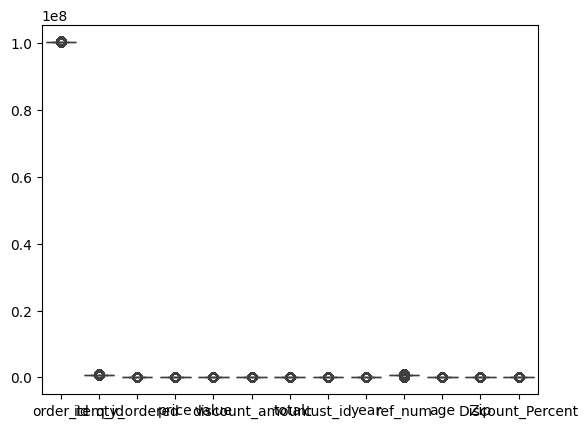

In [49]:
sns.boxplot(df)
plt.show()

In [ ]:
isf = IsolationForest(contamination=0.01 , random_state=42)
outliers_predict = isf.fit_predict(df[numeric_features])

mask_outliers = outliers_predict != -1 

df = df[mask_outliers].reset_index(drop=True)

In [ ]:
msn.bar(df)

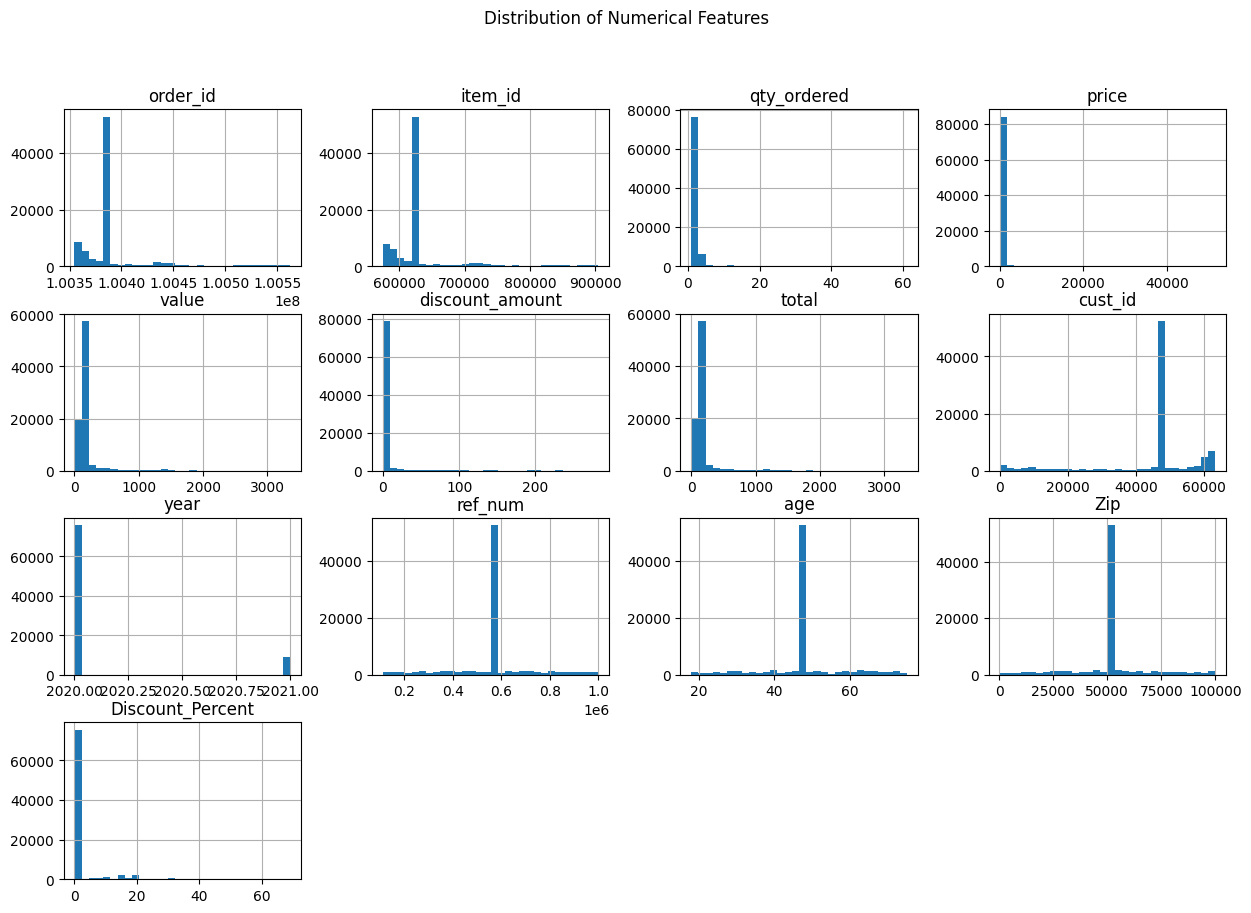

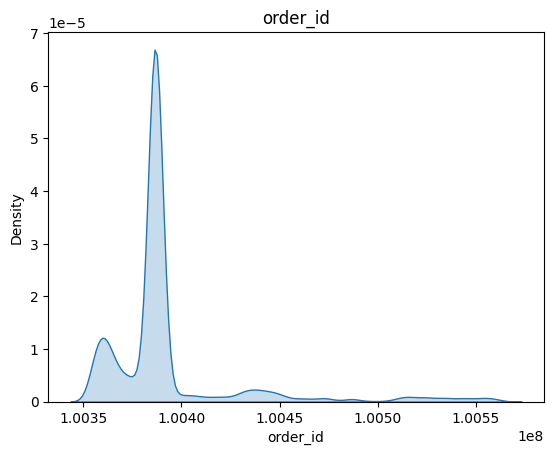

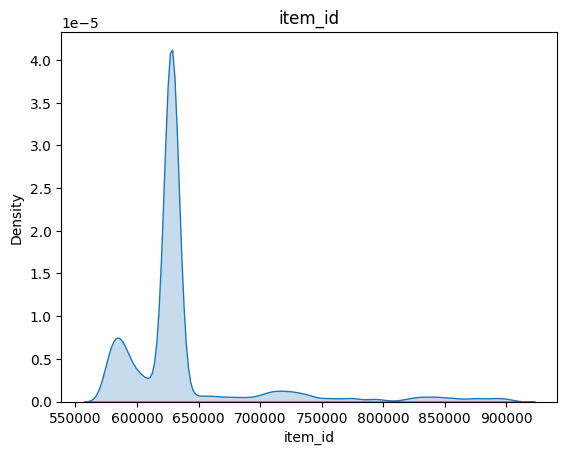

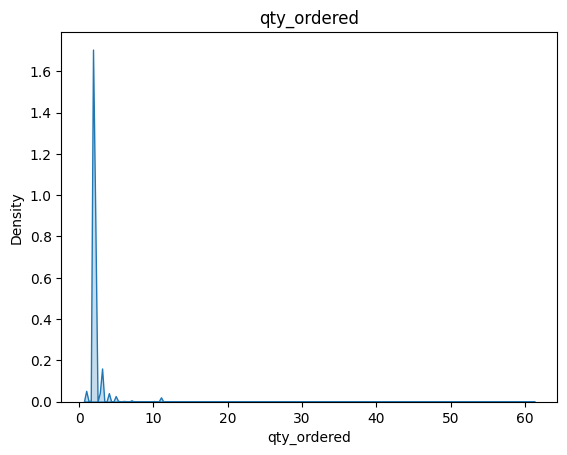

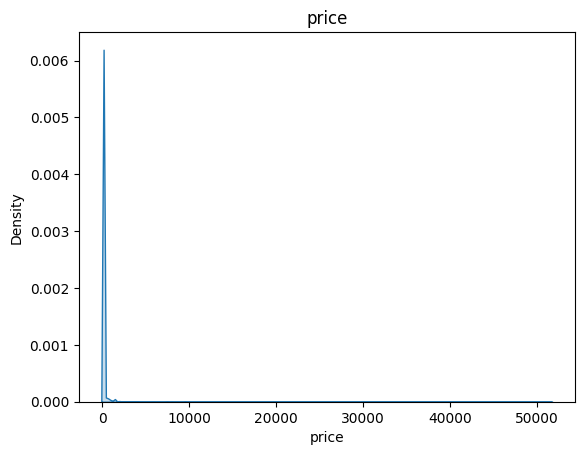

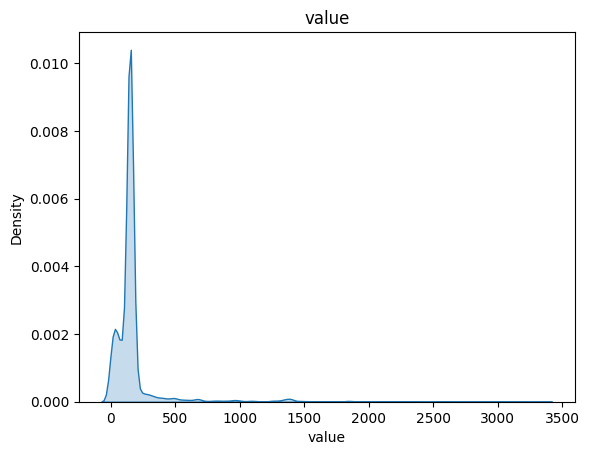

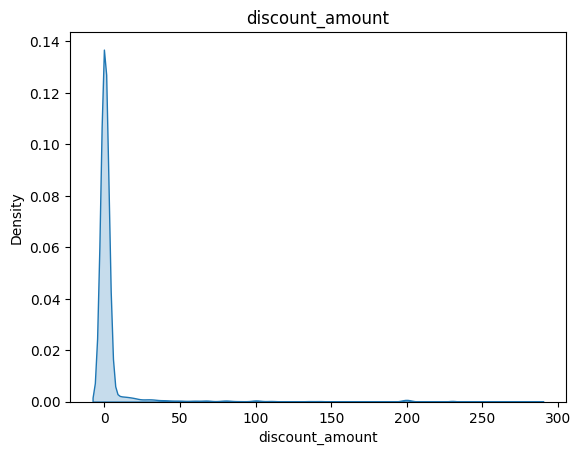

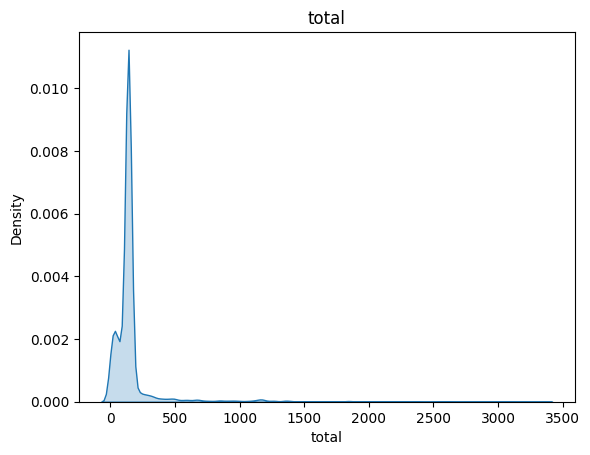

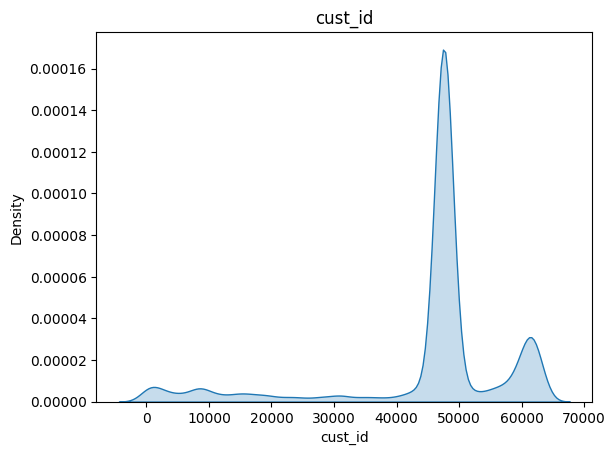

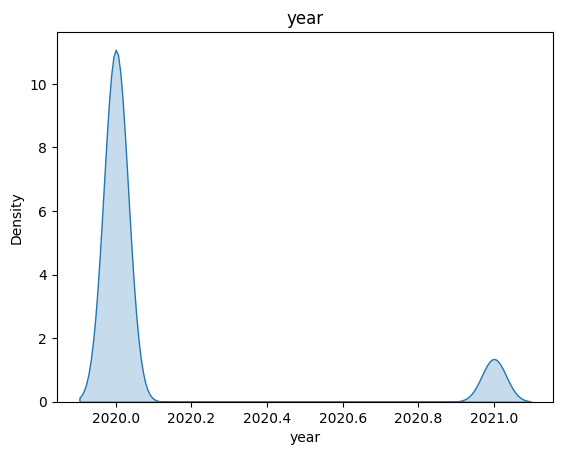

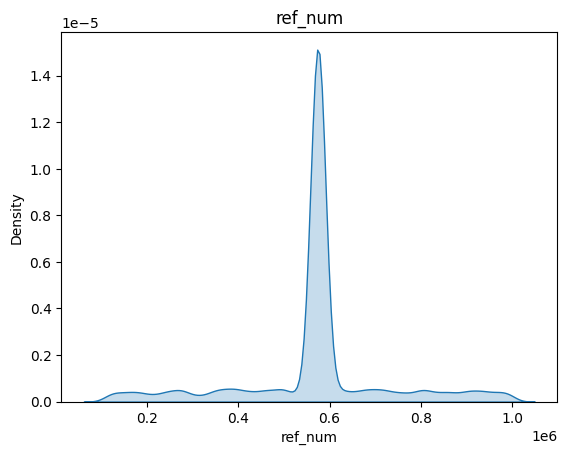

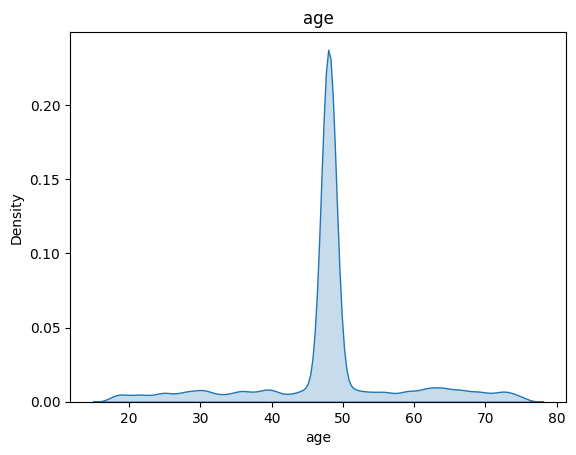

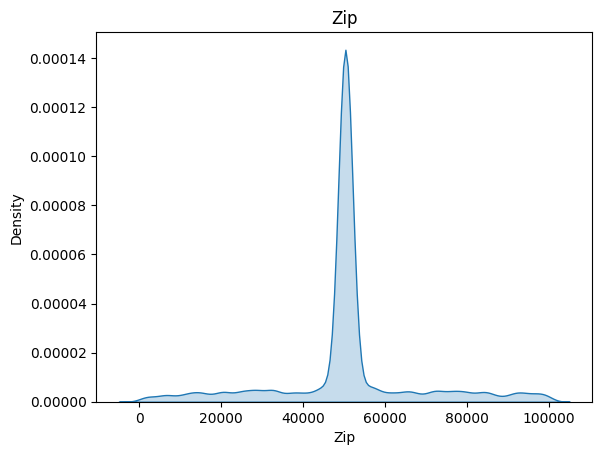

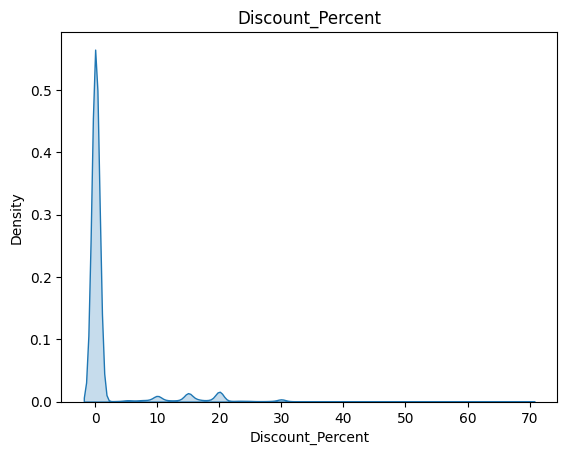

In [51]:
df[numeric_features].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# density plots
for col in numeric_features:
    sns.kdeplot(df[col], fill=True)
    plt.title(col)
    plt.show()


Value counts for order_date:
order_date
12-11-2020    62.265484
20-12-2020     1.912636
06-11-2020     1.198931
21-12-2020     0.873877
27-12-2020     0.782014
                ...    
17-08-2021     0.003533
20-07-2021     0.003533
25-08-2021     0.002355
27-08-2021     0.002355
30-08-2021     0.001178
Name: proportion, Length: 364, dtype: float64
------------


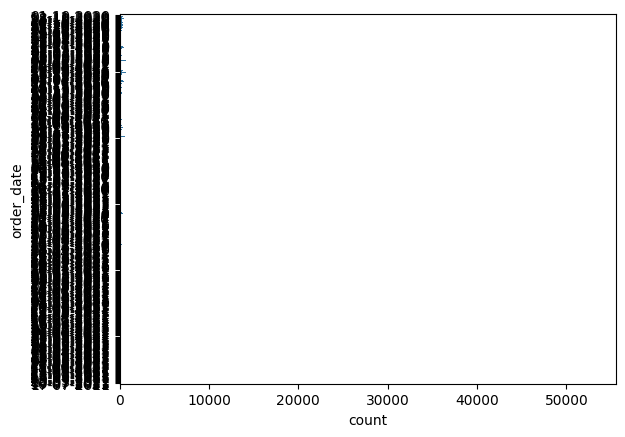

Value counts for status:
status
canceled          72.674275
complete          12.486309
received           6.775489
order_refunded     6.418636
refund             0.764348
cod                0.706639
paid               0.127195
closed             0.027088
pending            0.008244
processing         0.007066
pending_paypal     0.004711
Name: proportion, dtype: float64
------------


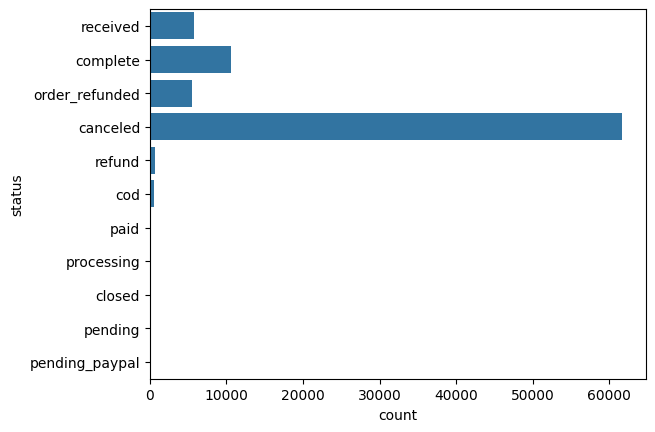

Value counts for sku:
sku
MATSAM59DB75ADB2F80       61.015911
MATINF59C9002A3CDEC        0.160171
MATINF59C9002EA6AF0        0.156638
MATIDR59BA510306FBE        0.138972
LIF59D62CE49B2A2           0.133084
                            ...    
MATROM59D5F5AD1ED16        0.001178
BAGARC5AB0ADDC20671        0.001178
MEFSHA59B2738B81A54-XL     0.001178
MATHTC59ACA1026DF99        0.001178
APPANE59FADA593609D        0.001178
Name: proportion, Length: 13072, dtype: float64
------------


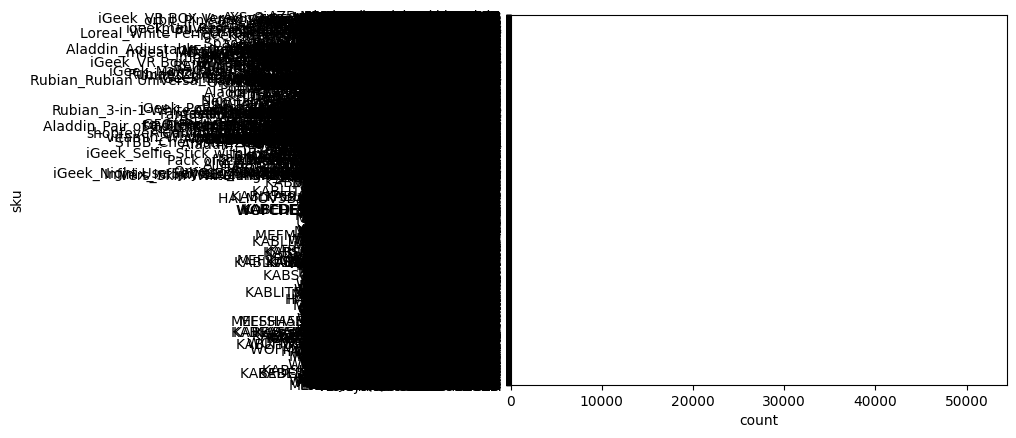

Value counts for category:
category
Mobiles & Tablets     66.704354
Men's Fashion          6.935661
Women's Fashion        5.715531
Beauty & Grooming      3.691010
Superstore             3.647434
Appliances             3.188119
Soghaat                2.549789
Home & Living          2.172915
Kids & Baby            1.137689
Health & Sports        1.118845
Entertainment          0.991650
Computing              0.966918
Others                 0.765525
Books                  0.213169
School & Education     0.201392
Name: proportion, dtype: float64
------------


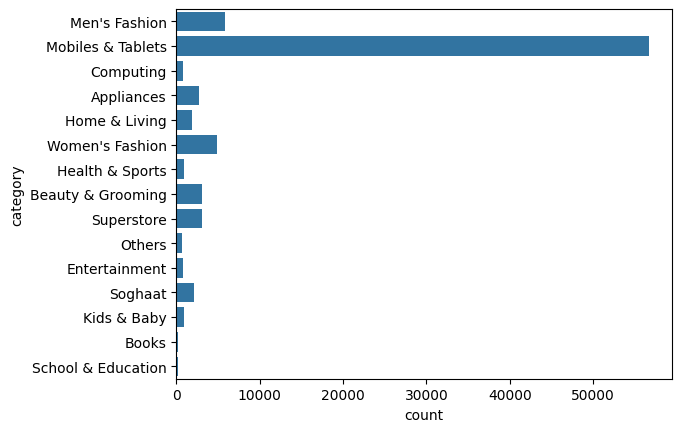

Value counts for payment_method:
payment_method
cod                  80.949016
Easypay               7.687053
Payaxis               5.417565
easypay_voucher       1.913814
customercredit        1.029337
Easypay_MA            0.997539
jazzwallet            0.707817
bankalfalah           0.637153
jazzvoucher           0.378052
mcblite               0.206103
apg                   0.073019
cashatdoorstep        0.002355
financesettlement     0.001178
Name: proportion, dtype: float64
------------


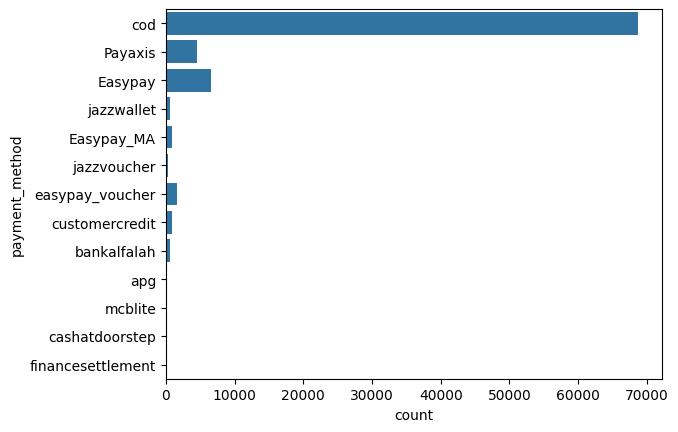

Value counts for bi_st:
bi_st
Gross    72.694296
Valid    14.792307
Net      12.513397
Name: proportion, dtype: float64
------------


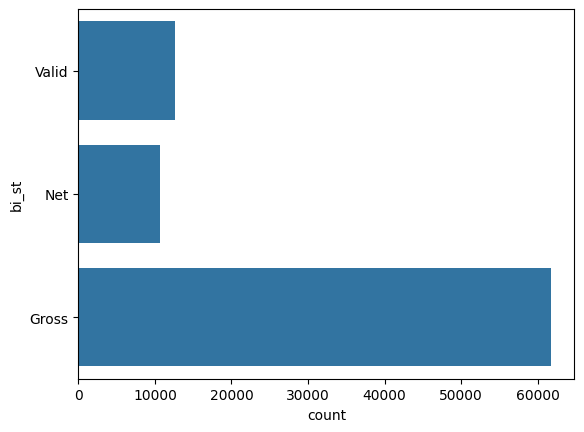

Value counts for month:
month
Nov-20    70.526093
Oct-20     9.319389
Dec-20     9.315856
Jan-21     2.586298
Mar-21     1.582871
Jun-21     1.492186
Apr-21     1.366168
Feb-21     1.281372
May-21     0.831478
Sep-21     0.641864
Jul-21     0.608887
Aug-21     0.447538
Name: proportion, dtype: float64
------------


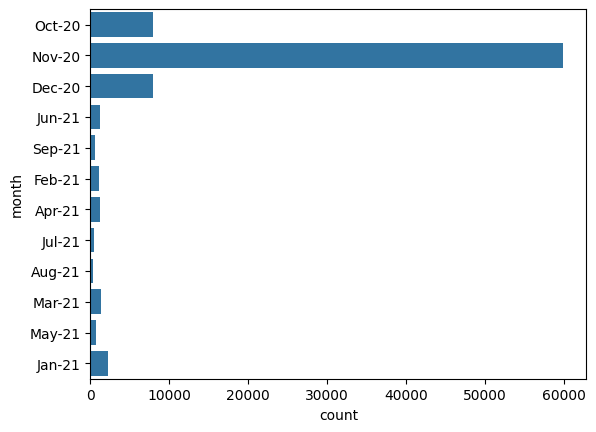

Value counts for Name Prefix:
Name Prefix
Mr.      75.085091
Ms.       7.857824
Mrs.      6.293797
Hon.      4.241011
Prof.     2.497968
Drs.      2.474414
Dr.       1.549895
Name: proportion, dtype: float64
------------


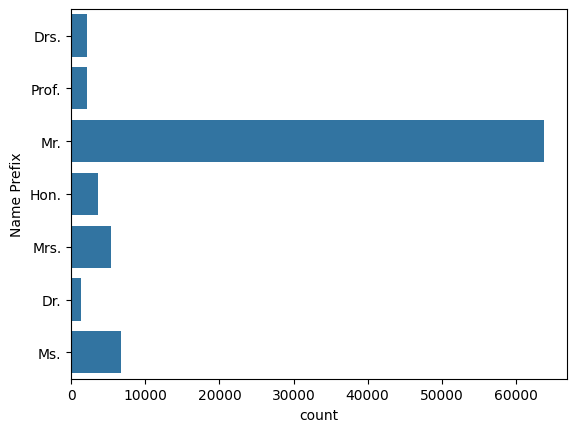

Value counts for First Name:
First Name
Hortencia    60.740322
Saul          0.356853
Isela         0.261456
Tommie        0.254390
Ruthann       0.254390
               ...    
Josefine      0.001178
Shiloh        0.001178
Fay           0.001178
Alisa         0.001178
Jonell        0.001178
Name: proportion, Length: 2659, dtype: float64
------------


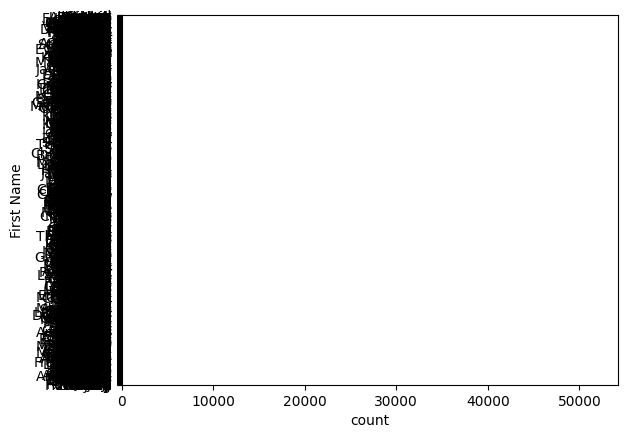

Value counts for Middle Initial:
Middle Initial
I    62.730688
P     1.927946
R     1.865527
N     1.863171
W     1.834906
A     1.717132
G     1.693578
X     1.651179
C     1.645291
T     1.642935
E     1.601715
Y     1.522807
Z     1.505141
U     1.500430
M     1.486297
J     1.472164
B     1.448610
K     1.434477
O     1.422700
D     1.390901
Q     1.372057
V     1.220130
S     1.051714
H     1.048181
F     0.983406
L     0.966918
Name: proportion, dtype: float64
------------


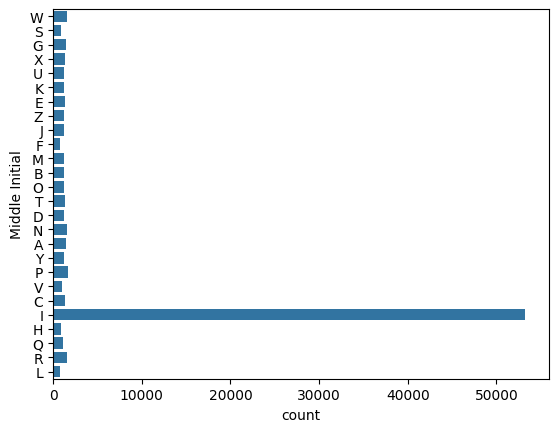

Value counts for Last Name:
Last Name
Beebe       60.740322
Hohn         0.356853
Cordova      0.269701
Schiff       0.254390
Younger      0.232013
              ...    
Gallien      0.001178
Maddocks     0.001178
Soliz        0.001178
Stough       0.001178
Murguia      0.001178
Name: proportion, Length: 3972, dtype: float64
------------


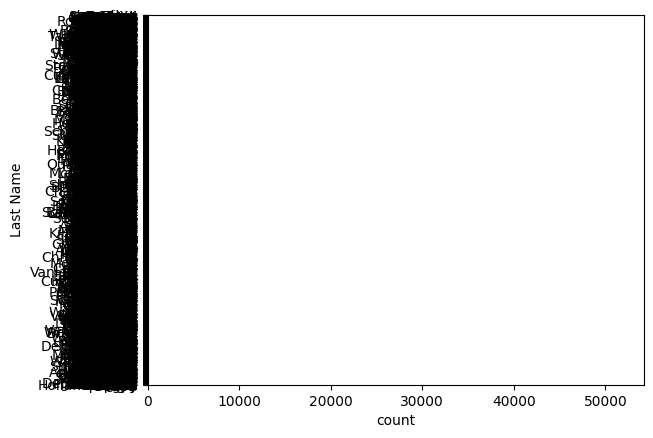

Value counts for Gender:
Gender
M    80.812399
F    19.187601
Name: proportion, dtype: float64
------------


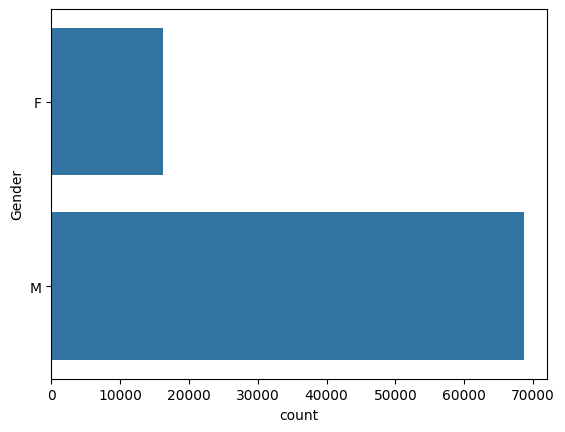

Value counts for full_name:
full_name
Beebe, Hortencia     60.740322
Hohn, Saul            0.355675
Cordova, Isela        0.261456
Schiff, Ruthann       0.254390
Younger, Prudence     0.230835
                       ...    
Saladino, Jacques     0.001178
Wardell, Dwight       0.001178
Holley, Raphael       0.001178
Dinapoli, Robbie      0.001178
Brammer, Hilario      0.001178
Name: proportion, Length: 4489, dtype: float64
------------


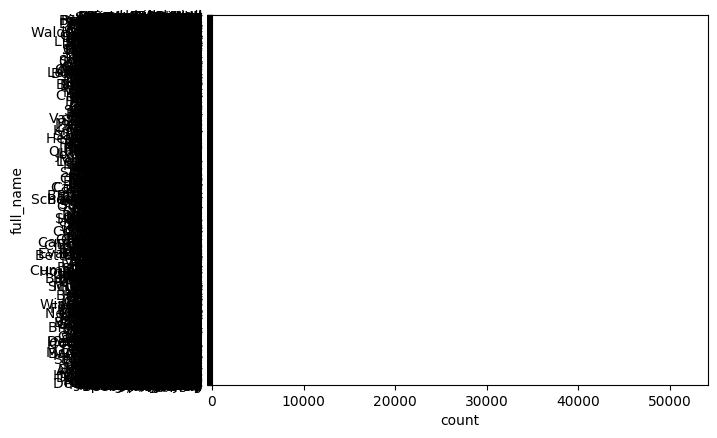

Value counts for E Mail:
E Mail
hortencia.beebe@hotmail.com    60.740322
saul.hohn@bp.com                0.355675
isela.cordova@hotmail.com       0.261456
ruthann.schiff@gmail.com        0.254390
prudence.younger@aol.com        0.230835
                                 ...    
jacques.saladino@gmail.com      0.001178
dwight.wardell@gmail.com        0.001178
raphael.holley@gmail.com        0.001178
robbie.dinapoli@yahoo.co.uk     0.001178
hilario.brammer@hotmail.com     0.001178
Name: proportion, Length: 4489, dtype: float64
------------


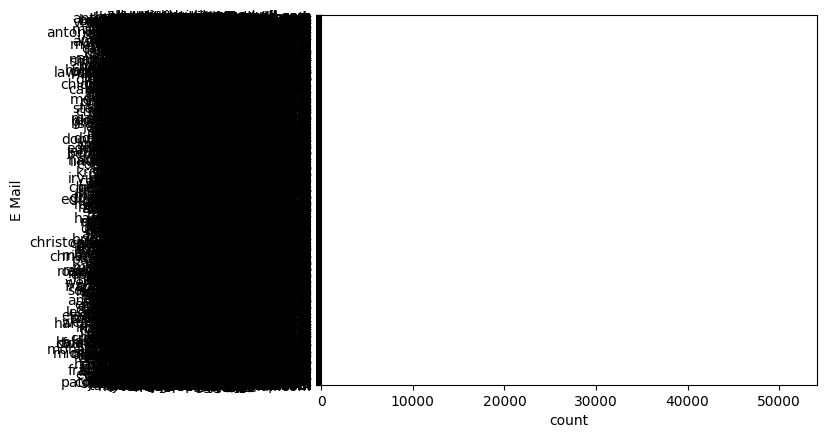

Value counts for Customer Since:
Customer Since
6/13/2001     60.740322
3/31/2017      0.413384
6/29/2016      0.330943
1/16/2013      0.261456
7/27/1986      0.254390
                ...    
05-11-1995     0.001178
07-09-2012     0.001178
3/13/2015      0.001178
6/23/2007      0.001178
1/26/2003      0.001178
Name: proportion, Length: 3419, dtype: float64
------------


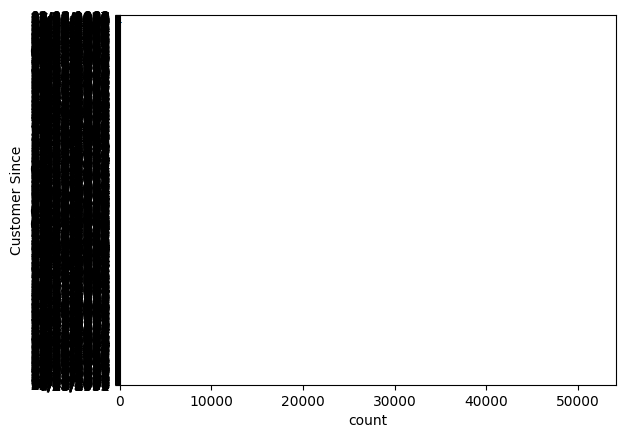

Value counts for SSN:
SSN
187-86-0281    60.740322
691-18-2163     0.355675
319-11-4194     0.261456
284-15-6899     0.254390
215-91-9391     0.230835
                 ...    
032-92-1972     0.001178
075-02-0727     0.001178
633-31-5974     0.001178
347-08-2767     0.001178
558-99-6824     0.001178
Name: proportion, Length: 4488, dtype: float64
------------


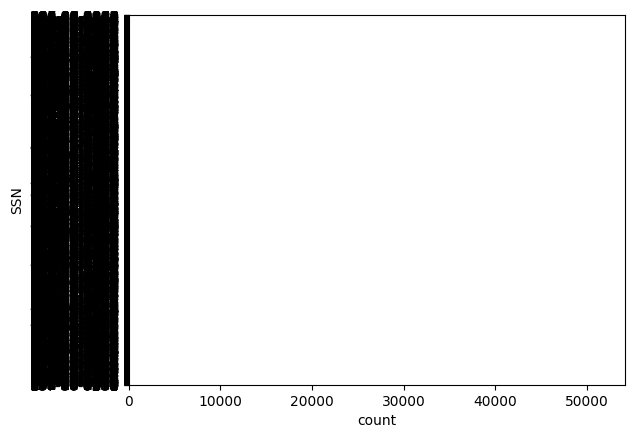

Value counts for Phone No. :
Phone No. 
802-964-9945    60.740322
216-894-7962     0.355675
252-765-0829     0.261456
405-668-6000     0.254390
808-682-1589     0.230835
                  ...    
314-205-9145     0.001178
210-830-7294     0.001178
209-913-8833     0.001178
270-944-7436     0.001178
239-462-9760     0.001178
Name: proportion, Length: 4489, dtype: float64
------------


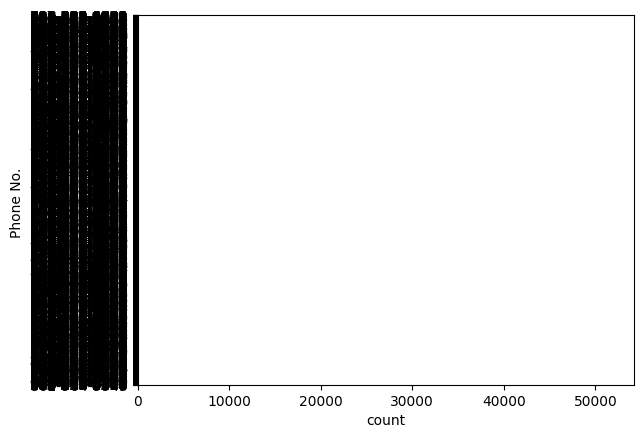

Value counts for Place Name:
Place Name
Dayton         61.085397
Washington      0.362741
Republic        0.355675
El Paso         0.329765
Cleveland       0.279122
                 ...    
Amador City     0.001178
Yermo           0.001178
Sutersville     0.001178
Annandale       0.001178
Fair Haven      0.001178
Name: proportion, Length: 3105, dtype: float64
------------


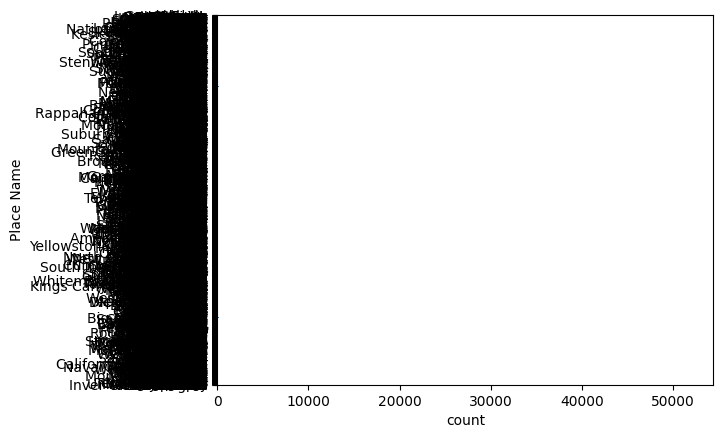

Value counts for County:
County
Los Angeles     61.344498
Montgomery       0.544112
Washington       0.429872
Jefferson        0.419272
Polk             0.378052
                  ...    
Hunterdon        0.001178
Reeves           0.001178
Queen Anne's     0.001178
Millard          0.001178
Waushara         0.001178
Name: proportion, Length: 1297, dtype: float64
------------


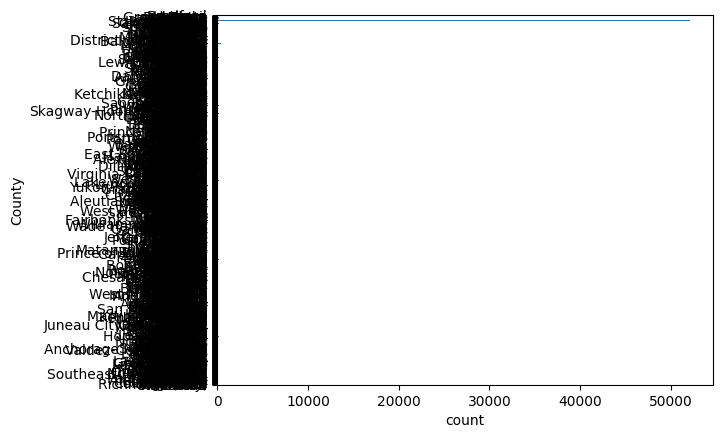

Value counts for City:
City
Dayton         61.085397
Washington      0.362741
Republic        0.355675
El Paso         0.329765
Cleveland       0.279122
                 ...    
Amador City     0.001178
Yermo           0.001178
Sutersville     0.001178
Annandale       0.001178
Fair Haven      0.001178
Name: proportion, Length: 3105, dtype: float64
------------


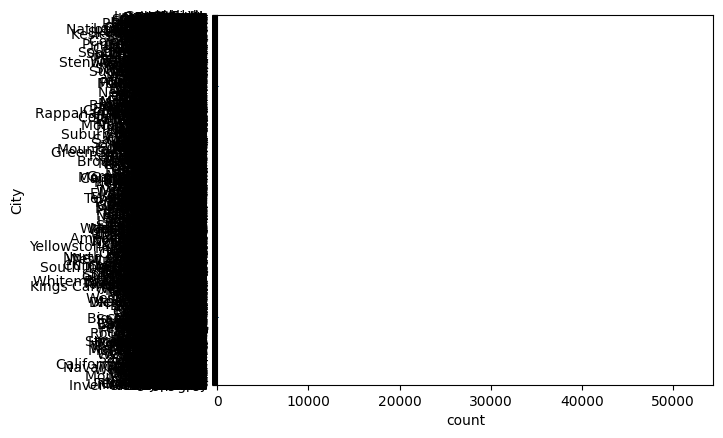

Value counts for State:
State
CA    63.042787
TX     2.227090
OH     2.090473
NY     1.957390
FL     1.598182
MN     1.589937
PA     1.522807
IA     1.244862
MO     1.208352
NC     1.141222
IL     1.136511
KY     1.069380
WV     1.059958
IN     0.916275
VA     0.902142
WI     0.839723
KS     0.787902
CO     0.764348
AR     0.758459
AZ     0.733727
LA     0.720772
TN     0.717238
MD     0.692506
GA     0.692506
OK     0.690151
MI     0.687795
SD     0.683084
MA     0.632442
AL     0.612420
WY     0.555889
NJ     0.481692
NE     0.481692
CT     0.476981
WA     0.459315
AK     0.446360
UT     0.436938
MT     0.412206
SC     0.411028
NM     0.386296
MS     0.358030
OR     0.349786
DC     0.347431
ND     0.301499
HI     0.269701
ME     0.214347
VT     0.210814
ID     0.203748
NV     0.201392
NH     0.156638
DE     0.083619
RI     0.034154
Name: proportion, dtype: float64
------------


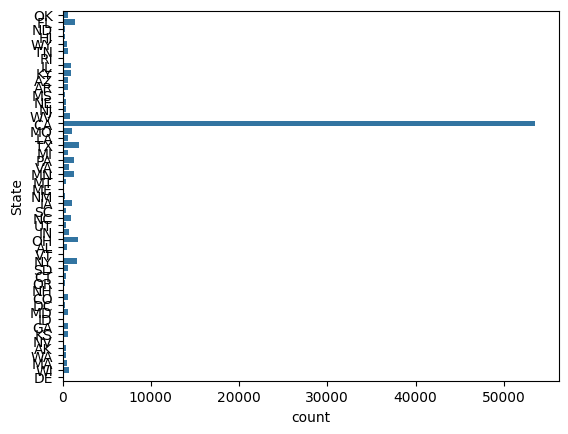

Value counts for Region:
Region
South        74.822457
Midwest      11.968107
West          7.522171
Northeast     5.687265
Name: proportion, dtype: float64
------------


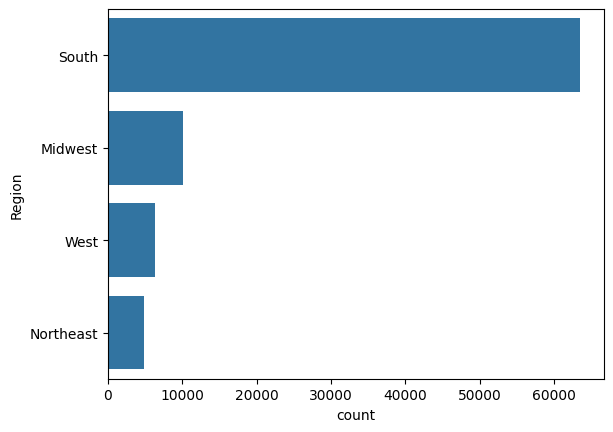

Value counts for User Name:
User Name
hmbeebe       60.740322
sahohn         0.355675
iicordova      0.261456
ruschiff       0.254390
pwyounger      0.230835
                ...    
jnsaladino     0.001178
djwardell      0.001178
rtholley       0.001178
rudinapoli     0.001178
hwbrammer      0.001178
Name: proportion, Length: 4489, dtype: float64
------------


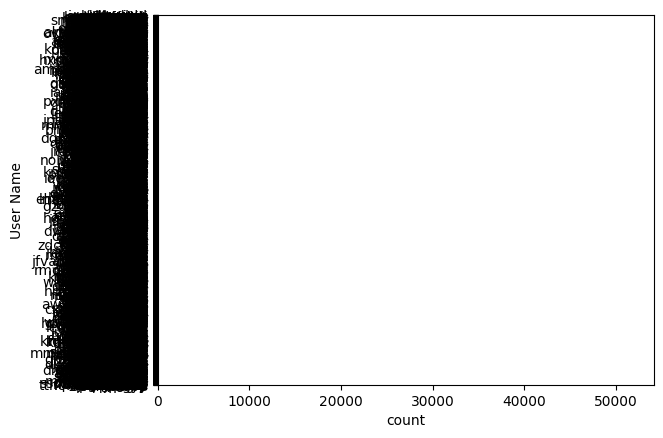

In [52]:
for col in categorical_features:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(normalize=True)*100)
    print("------------")
    sns.countplot(y=df[col])
    plt.show()
